# Calculating Band Indices 

An index is a useful means for extracting information from imagery that can inform about the presense of various materials like water, vegetation, clouds, or snow within an image. They are simple statistics that combine image bands (different visual and non-visual wavelengths) most often as `normalized differences`. 

In this notebook we'll show how combine bands in different ways to produce a variety of different indices.

Fetching Image... 48 tiles


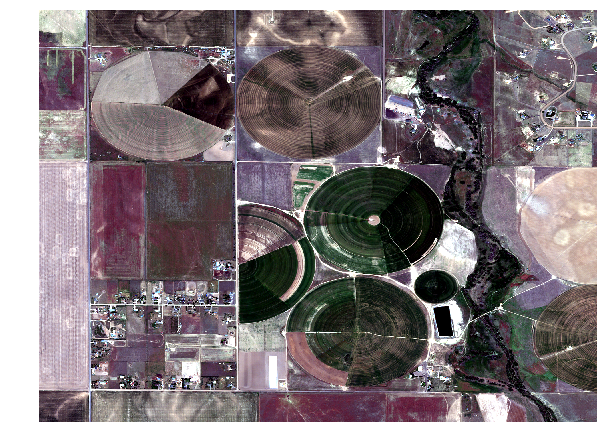

In [5]:
from gbdxtools import CatalogImage

catalog_id = '103001006D16B800'
bbox = [-104.6437454223633, 39.92632289365535, -104.60803985595705, 39.95264623566985]

image = CatalogImage(catalog_id, bbox=bbox)
image.plot(w=10, h=10)

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(img, w=10, h=7, cmap='jet'):
    f, ax = plt.subplots(1, figsize=(w,h))
    ax.axis('off')
    plt.imshow(img, cmap=cmap)
    plt.colorbar()
    plt.show()

def calc_index(img, index='NDVI'):
    def _calculate(NIR, Red, SWIR=None, Green=None):
        if index == 'NDWI':
            return (NIR - SWIR)/(NIR + SWIR)
        elif index == 'SAVI':
            return ((Red - NIR)/(Red - NIR + 0.5)) * (1 + 0.5)
        elif index == 'NDSI':
            return (Green - SWIR)/(Green + SWIR)
        else:
            return (Red - NIR)/(Red + NIR)
        
    if img.shape[0] != 8:
        raise 'Must use 8-band Multi-spectral imagery'
        
    #img = img.clip(0.0, 1.0)
    red = img[4,:,:]  
    nir = img[6,:,:]   
    swir = img[7,:,:]  
    green = img[2,:,:]
    
    return _calculate(red, nir, SWIR=swir, Green=green)

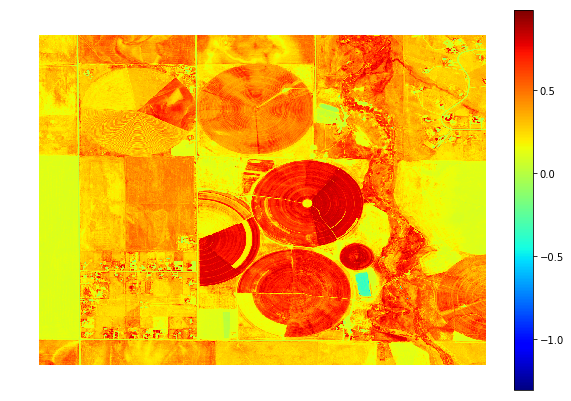

In [56]:
ndvi = calc_index(image, index='ndvi')
plot(ndvi)

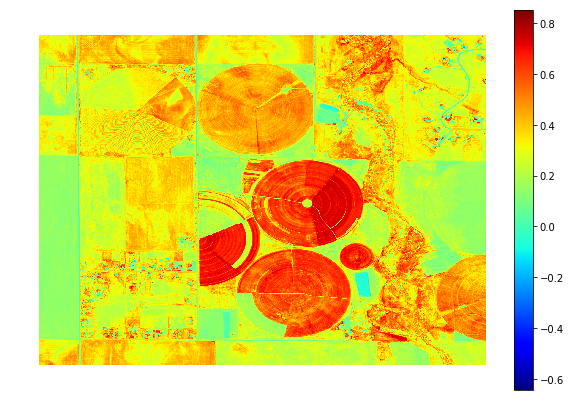

In [49]:
savi = calc_index(image, index='SAVI')
plot(savi)

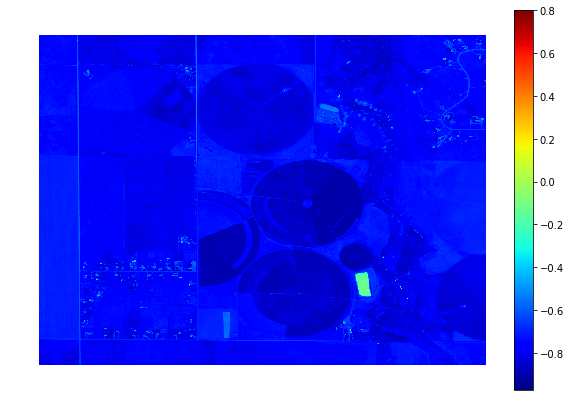

In [55]:
ndsi = calc_index(image, index='NDSI')
plot(ndsi)